### ML Assignment 2023-2024 

#### Import libraries that will be used

In [21]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.metrics import make_scorer, f1_score, accuracy_score, balanced_accuracy_score
from sklearn.metrics.cluster import fowlkes_mallows_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier

# In case imblearn is not installed, run the line in comment first
#!pip install -U imbalanced-learn
from imblearn.metrics import geometric_mean_score

## Dataset Description

* JM1 = M1 is written in "C" and is a real-time predictive ground system: Uses simulations to generate predictions (description: [here](https://www.openml.org/search?type=data&status=active&id=1053&sort=runs))
* MC1 = The specific type of software is unknown (description: [here](https://www.openml.org/search?type=data&status=active&id=1056&sort=runs)) 
* PC3 = Data from flight software for earth orbiting satellite (description: [here](https://www.openml.org/search?type=data&status=active&id=1050&sort=runs))





| **JM1 Variable** | **JM1 Description** |
|----------|-------------|
|loc|numeric % McCabe's line count of code| 
|v(g)|numeric % McCabe "cyclomatic complexity"|
|ev(g)|numeric % McCabe "essential complexity|
|iv(g)|numeric % McCabe "design complexity"|
|n|numeric % Halstead total operators + operands|
|v|numeric % Halstead "volume"|
|l|numeric % Halstead "program length"|
|d|numeric % Halstead "difficulty"|
|i|numeric % Halstead "intelligence"| 
|e|numeric % Halstead "effort"|
|b|numeric % Halstead|
|t|numeric % Halstead's time estimator|
|lOCode|numeric % Halstead's line count|
|lOComment|numeric % Halstead's count of lines of comments|
|lOBlank|numeric % Halstead's count of blank lines|
|locCodeAndComment|numeric|
|uniq_Op|numeric % unique operators|
|uniq_Opnd|numeric % unique operands|
|total_Op|numeric % total operators|
|total_Opnd|numeric % total operands|
|branchCount|numeric % of the flow graph|
|defects|{false,true} % module has/has not one or more reported defects|


| **PC3 Variable** | **MC1 Variable** |
|----------|-------------|
|LOC_BLANK|LOC_BLANK|
|BRANCH_COUNT|BRANCH_COUNT|
|CALL_PAIRS|CALL_PAIRS|
|LOC_CODE_AND_COMMENT|LOC_CODE_AND_COMMENT|
|LOC_COMMENTS|LOC_COMMENTS|
|CONDITION_COUNT|CONDITION_COUNT|
|CYCLOMATIC_COMPLEXITY|CYCLOMATIC_COMPLEXITY|
|CYCLOMATIC_DENSITY|CYCLOMATIC_DENSITY|
|DECISION_COUNT|DECISION_COUNT|
|DECISION_DENSITY||
|DESIGN_COMPLEXITY|DESIGN_COMPLEXITY|
|DESIGN_DENSITY|DESIGN_DENSITY|
|EDGE_COUNT|EDGE_COUNT|
|ESSENTIAL_COMPLEXITY|ESSENTIAL_COMPLEXITY|
|ESSENTIAL_DENSITY|ESSENTIAL_DENSITY|
|LOC_EXECUTABLE|LOC_EXECUTABLE|
|PARAMETER_COUNT|PARAMETER_COUNT|
|HALSTEAD_CONTENT|HALSTEAD_CONTENT|
||GLOBAL_DATA_COMPLEXITY|
||GLOBAL_DATA_DENSITY|
|HALSTEAD_DIFFICULTY|HALSTEAD_DIFFICULTY|
|HALSTEAD_EFFORT|HALSTEAD_EFFORT|
|HALSTEAD_ERROR_EST|HALSTEAD_ERROR_EST|
|HALSTEAD_LENGTH|HALSTEAD_LENGTH|
|HALSTEAD_LEVEL|HALSTEAD_LEVEL|
|HALSTEAD_PROG_TIME|HALSTEAD_PROG_TIME|
|HALSTEAD_VOLUME|HALSTEAD_VOLUME|
|MAINTENANCE_SEVERITY|MAINTENANCE_SEVERITY|
|MODIFIED_CONDITION_COUNT|MODIFIED_CONDITION_COUNT|
|MULTIPLE_CONDITION_COUNT|MULTIPLE_CONDITION_COUNT|
|NODE_COUNT|NODE_COUNT|
|NORMALIZED_CYLOMATIC_COMPLEXITY|NORMALIZED_CYLOMATIC_COMPLEXITY|
|NUM_OPERANDS|NUM_OPERANDS|
|NUM_OPERATORS|NUM_OPERATORS|
|NUM_UNIQUE_OPERANDS|NUM_UNIQUE_OPERANDS|
|NUM_UNIQUE_OPERATORS|NUM_UNIQUE_OPERATORS|
|NUMBER_OF_LINES|NUMBER_OF_LINES|
|PERCENT_COMMENTS|PERCENT_COMMENTS|
|LOC_TOTAL|LOC_TOTAL|
|c|c|

In [22]:
path_to_file=os.getcwd()

# File names of the 3 input datasets
file_name_jm1='/jm1.csv'
file_name_mc1='/mc1.csv'
file_name_pc3='/pc3.csv'

# Read as dataframes the input files
jm1=pd.read_csv(path_to_file+file_name_jm1)
mc1=pd.read_csv(path_to_file+file_name_mc1)
pc3=pd.read_csv(path_to_file+file_name_pc3)

In [23]:
# Show the first 5 records of mc1 dataset
mc1.head()

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DESIGN_COMPLEXITY,...,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,c
0,0,1,0,0,0,0,1,1.00,0,1,...,2,0.50,2,3,2,3,2,0.00,0,False
1,0,1,0,0,0,0,1,1.00,0,1,...,2,1.00,2,3,2,3,1,0.00,0,False
2,0,1,1,0,0,0,1,1.00,0,1,...,3,0.50,3,6,3,6,2,0.00,0,False
3,8,17,11,32,3,12,13,0.16,6,10,...,32,0.14,75,137,37,25,93,42.17,80,False
4,4,7,1,1,8,12,4,0.17,6,1,...,18,0.11,52,61,13,10,38,28.13,24,False


In [24]:
# Show the first 5 records of pc3 dataset
pc3.head()

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,...,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,c
0,2,1,0,0,0,0,1,0.10,0,0.00,...,2,0.08,28,29,9,5,13,0.00,10,False
1,1,1,4,0,0,0,1,0.07,0,0.00,...,6,0.06,52,55,26,14,16,0.00,14,False
2,27,19,1,4,13,26,11,0.26,12,2.17,...,25,0.13,58,78,30,24,83,30.91,42,False
3,2,17,2,0,0,24,9,0.47,8,3.00,...,25,0.41,73,81,23,20,22,0.00,19,False
4,6,1,1,0,2,0,1,0.11,0,0.00,...,3,0.06,19,23,15,7,18,18.18,9,False


In [25]:
# Show the first 5 records of jm1 dataset
jm1.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1,1,1,1,1,True
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,51,10,8,1,17,36,112,86,13,True
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,129,29,28,2,17,135,329,271,5,True
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,28,1,6,0,11,16,76,50,7,True


## Part 1 - Data pre processing

#### NOTE: Μήπως να εφαρμόσουμε κάποιον αλγόριθμο για preprocessing & data cleaning? Η να βάλουμε και plots?

##### Pre processing steps
* Search for NULL values - No NULL values found
* Search for special characters - BrachCount,uniq_Op,uniq_Opnd, total_Op,total_Opnd variables in JM1 contain "?". These needs to be removed
* Descriptive statistics for all numeric variables

In [26]:
# Create a list containing all 3 datasets
dfs = [jm1, mc1, pc3]

In [27]:
# Print the number of missing values for each variable of each dataset - No missing values
for df in dfs:
    print(df.isnull().sum())    

loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64
LOC_BLANK                          0
BRANCH_COUNT                       0
CALL_PAIRS                         0
LOC_CODE_AND_COMMENT               0
LOC_COMMENTS                       0
CONDITION_COUNT                    0
CYCLOMATIC_COMPLEXITY              0
CYCLOMATIC_DENSITY                 0
DECISION_COUNT                     0
DESIGN_COMPLEXITY                  0
DESIGN_DENSITY                     0
EDGE_COUNT                         0
ESSENTIAL_COMPLEXITY               0


**Remove all rows from jm1 that contain special characters like '?'**

In [28]:
print('Number of rows before',jm1.shape)                                    # (10885,22)

# Remove all rows from jm1 dataset that contain special characters like '?'
cols = ['branchCount','uniq_Op','uniq_Opnd','total_Op','total_Opnd']

for col in cols:
    jm1 = jm1.drop(jm1[jm1[col].str.contains(r'[?]')].index)
    
#Update the list of dataframes
dfs[0] = jm1

print('Number of rows after',jm1.shape)                                   # (10880,22) - 5 rows removed

Number of rows before (10885, 22)
Number of rows after (10880, 22)


In [29]:
#Create a function that converts True/False of the last column of the dataset into 1/0 

def converter(df):
    """"
    Creates a new 'target' column in the Dataframe based on the value of the last column of the initial dataset.
    If the value is True then target=1 else target=0
    
    Parameters:
    - df (pandas.DataFrame): The input DataFrame
    
    Returns:
    - df (pandas.Dataframe): The DataFrame with the added 'target column'
    
    """
    last_column_name = df.columns[-1]
    df['target'] = df.apply(lambda row: 1 if row[last_column_name] else 0, axis=1)
    
    return df

In [30]:
# Apply the function to all datasets
for d in dfs:
    d = converter(d)

In [31]:
for df in dfs:
    print(df['target'].value_counts())

target
0    8777
1    2103
Name: count, dtype: int64
target
0    9398
1      68
Name: count, dtype: int64
target
0    1403
1     160
Name: count, dtype: int64


**We can observe that the class of False (0) significantly outnumebrs the class of True (1). That means that our data is highly imbalanced.**

**Descriptive statistics for all numeric variables and maybe boxplots - Some numeric variables may have 999999 instead of missing. With descr. stats and boxplots, we'll catch it**

### Visualizing all features to select the most appropriate ones - No normalization

In [ ]:
# Y =mc1.target                  # Target variable 

# # Setup the colors for the Figures

# colors = { 0:'blue', 1:'red' }
# ecolors = [ colors[y] for y in Y ]
# red = mpatches.Patch(color='red', label='True')
# blue = mpatches.Patch(color='blue', label='False')


In [ ]:
# # We will check all scatterplots of the features against the target variable 

# for i in range(len(mc1.columns)-2):
#     column = mc1.columns[i]
#     X = mc1.iloc[:,i:i+1]
    
#     fig = plt.figure(figsize=(18, 5))
#     plt.scatter(X,Y, facecolors='none', edgecolors=ecolors, cmap=colors)
#     plt.xlabel(column)
#     plt.ylabel('class')
#     plt.legend(handles=[red, blue], loc=1)
    

### Visualizing all features to select the most appropriate ones - Min-max normalization

In [ ]:
# We will check all scatterplots of the features against the target variable 

# for i in range(len(mc1.columns)-2):
#     column = mc1.columns[i]
#     X = mc1.iloc[:,i:i+1]
    
#     mms = MinMaxScaler()
#     X_trans =  mms.fit_transform(X)
    
#     fig = plt.figure(figsize=(18, 5))
#     plt.scatter(X_trans,Y, facecolors='none', edgecolors=ecolors, cmap=colors)
#     plt.xlabel(column)
#     plt.ylabel('class')
#     plt.legend(handles=[red, blue], loc=1)
    

### Visualizing all features to select the most appropriate ones - Standardization

In [ ]:
# We will check all scatterplots of the features against the target variable 

# for i in range(len(mc1.columns)-2):
#     column = mc1.columns[i]
#     X = mc1.iloc[:,i:i+1]
#     stdsc = StandardScaler()
#     X_trans = stdsc.fit_transform(X)
    
#     fig = plt.figure(figsize=(18, 5))
#     plt.scatter(X_trans,Y, facecolors='none', edgecolors=ecolors, cmap=colors)
#     plt.xlabel(column)
#     plt.ylabel('class')
#     plt.legend(handles=[red, blue], loc=1)

In [68]:
def ml_algorithm(df, classifier, method ):
    """"
    Creates a new dataframe which calculates accuracy, f1 and g-mean score as well as fitting time for the chosen
    classifier and method.
    
    Parameters:
    - df (pandas.DataFrame): The input DataFrame
    - classifier           : The ML algorith that will be tested e.g. Logistic Regression, SVM etc.
    - method               : The normalization/standardization applied on the input data e.g. min-max normalization, 
                             feature standardization
    
    Returns:
    - data (pandas.Dataframe): The DataFrame with the calculated metrics 
    - scores (Style object)  : A view of the data with the highlighted cells
    """
    # Target variable
    Y = df.target
    

    scorers = {
        'accuracy_score': make_scorer(accuracy_score),
        'f1_score': make_scorer(f1_score, average='weighted'),
        'g_mean': make_scorer(geometric_mean_score)
    }



    
    # Feature selection 
    X = df.iloc[:,:-1]
    #column = df.columns[i]
        
    # Feature transformation based on the selected method
    if method=='Min-Max normalization':
        mms = MinMaxScaler()
        X_trans =  mms.fit_transform(X)
    elif method=='Standardization':
        stdsc = StandardScaler()
        X_trans = stdsc.fit_transform(X)
    elif method=='No normalization':
        X_trans = X
    else:
        print('Wrong method selected, choose one of the following: normalization, standardization or No normalization')

            
    
    # Random permutations cross-validation a.k.a. Shuffle & Split
    #cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=16, stratify=y)
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    
    # Initiate an instance of the selected classifier
    if classifier=='LogisticRegression':                                                        # Logistic Regression model
        c = linear_model.LogisticRegression(solver='liblinear', max_iter=5000)
            
    elif classifier=='Perceptron':                                                              # Perceptron
        c = linear_model.Perceptron()
            
    elif classifier=='LinearSVM':                                                               # Linear SVM
        c = LinearSVC(C = 1.0, random_state = 1, dual='auto', max_iter=10000)
            
    elif classifier=='RBF-SVM':                                                                 # RBF SVM
        c = SVC(kernel='rbf', C = 1.0, random_state = 1, max_iter=10000)
            
    elif classifier=='DecisionTree':                                                            # Decision Tree
        max_depth = 3
        c = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = 1)
            
    elif classifier=='RandomForest':                                                            # Random Forests
        c = RandomForestClassifier(criterion='gini', n_estimators=15, random_state=1, n_jobs=2)
            
    elif classifier=='NeuralNetwork':                                                           # Feed-Forward Neural Network
        c = MLPClassifier(activation = 'relu', hidden_layer_sizes = (7, 4, 2), alpha = 0.3, max_iter=300)
            
    else:
        print('Wrong classifier. Select one of the following: LogisticRegression, Perceptron, LinearSVM,RBF-SVM, DecisionTree, RandomForest, NeuralNetwork')

    
    cv_results = cross_validate(c, X_trans, Y, cv=cv, scoring=scorers, return_train_score=True)
    #cv_results = cross_val_score(c, X_trans,Y, cv=cv, scoring=accuracy_score)
    
    #Append the results
    accuracy_scores    =cv_results['test_accuracy_score'].mean()
    f1_scores          =cv_results['test_f1_score'].mean()
    fit_time           =cv_results['fit_time'].mean()
    g_mean_scores      =cv_results['test_g_mean'].mean()
        
    # Create a dictionary with all metrics and values
    dict = {'classifier'    :classifier, 
            'method'        :method, 
            'accuracy_score':accuracy_scores,
            'f1_scores'     :f1_scores,
            'fit_time'      :fit_time,
            'g_mean_scores' :g_mean_scores}
    
    # Put all together in a DataFrame  and round all scores to 2 decimal points
    scores = pd.DataFrame([dict]).round(decimals=3)

    return scores

## Part 2 - Apply to JM1 dataset

In [69]:
# Example - You can choose whatever classifier and method you want
# scores = ml_algorithm(jm1,classifier='NeuralNetwork',method='No normalization')
# scores

### We'll calculate all scores for each combination of classifier and normalization method

For jm1:

In [ ]:
methods = ['No normalization','Min-Max normalization','Standardization']
classifiers = ['LogisticRegression','Perceptron','LinearSVM','RBF-SVM','DecisionTree','RandomForest','NeuralNetwork']
results = pd.DataFrame()

for c in classifiers:
    for m in methods:
        scores = ml_algorithm(mc1,classifier=c, method=m)
        results = pd.concat([results,scores],ignore_index=True)
        


In [67]:
results

,classifier,method,accuracy_score,f1_scores,fit_time,g_mean_scores
0,LogisticRegression,No normalization,1.00,1.00,1.53,0.88
1,LogisticRegression,Min-Max normalization,1.00,1.00,0.03,0.99
2,LogisticRegression,Standardization,1.00,1.00,0.05,1.00
3,Perceptron,No normalization,0.89,0.93,0.01,0.00
4,Perceptron,Min-Max normalization,1.00,1.00,0.01,1.00
5,Perceptron,Standardization,1.00,1.00,0.01,0.98
6,LinearSVM,No normalization,1.00,1.00,1.00,0.87
7,LinearSVM,Min-Max normalization,1.00,1.00,0.02,1.00
8,LinearSVM,Standardization,1.00,1.00,0.57,1.00
9,RBF-SVM,No normalization,0.99,0.99,0.08,0.00


**Create the barplot**

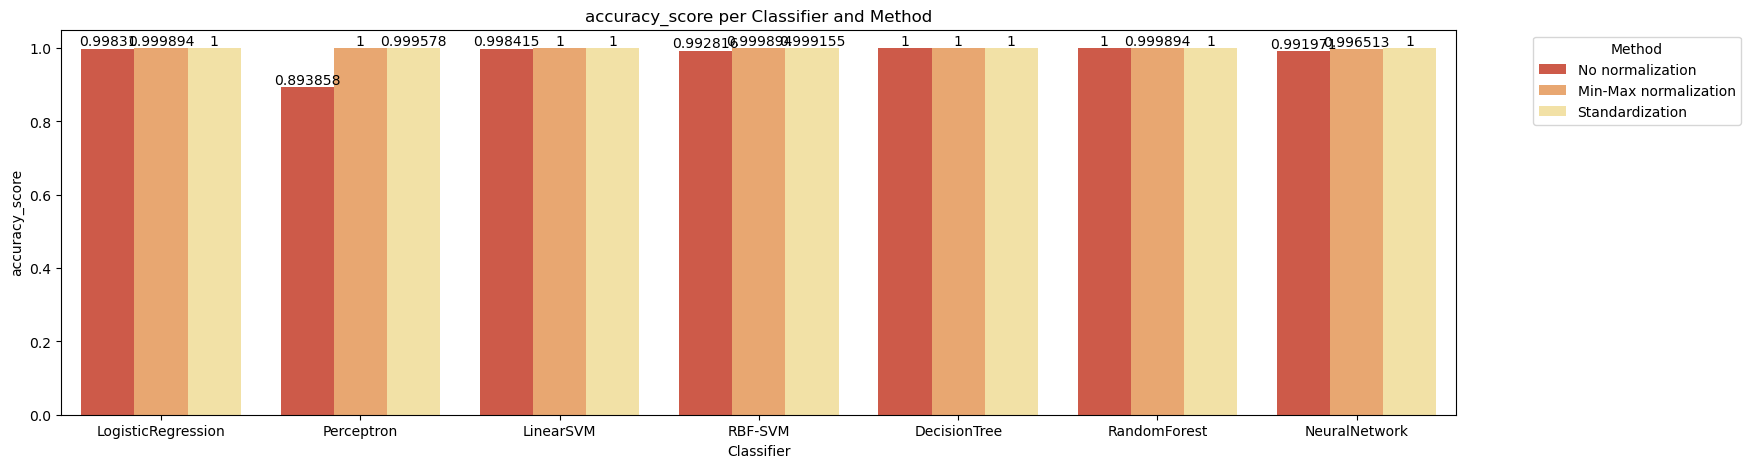

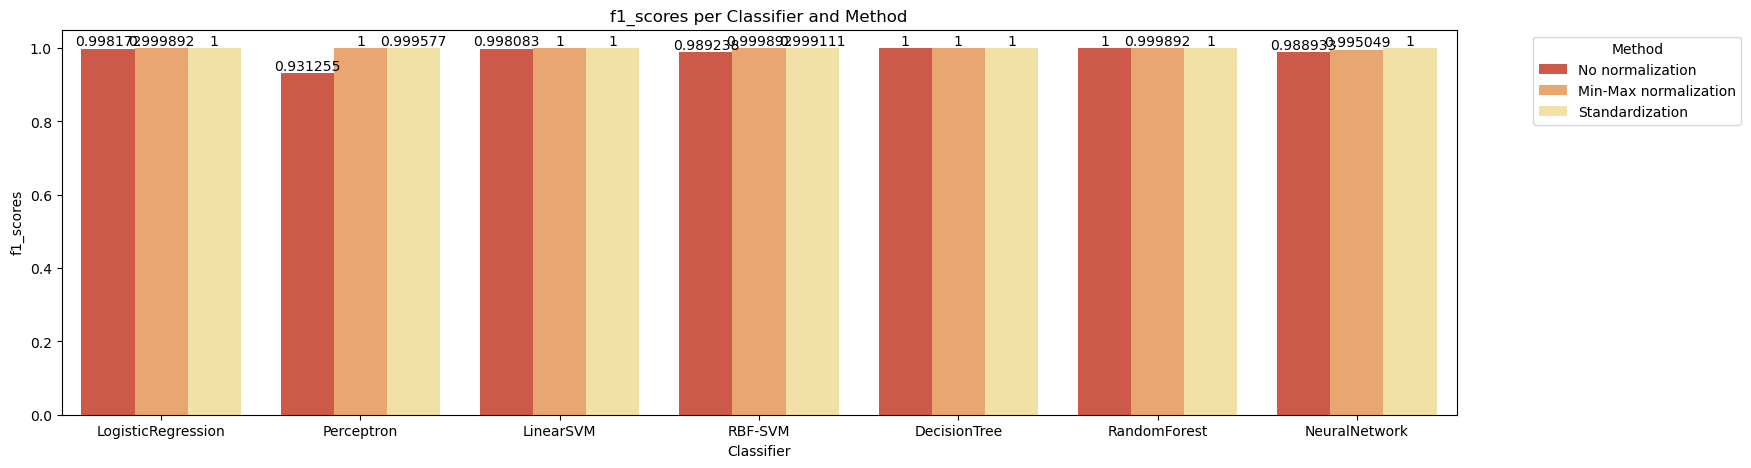

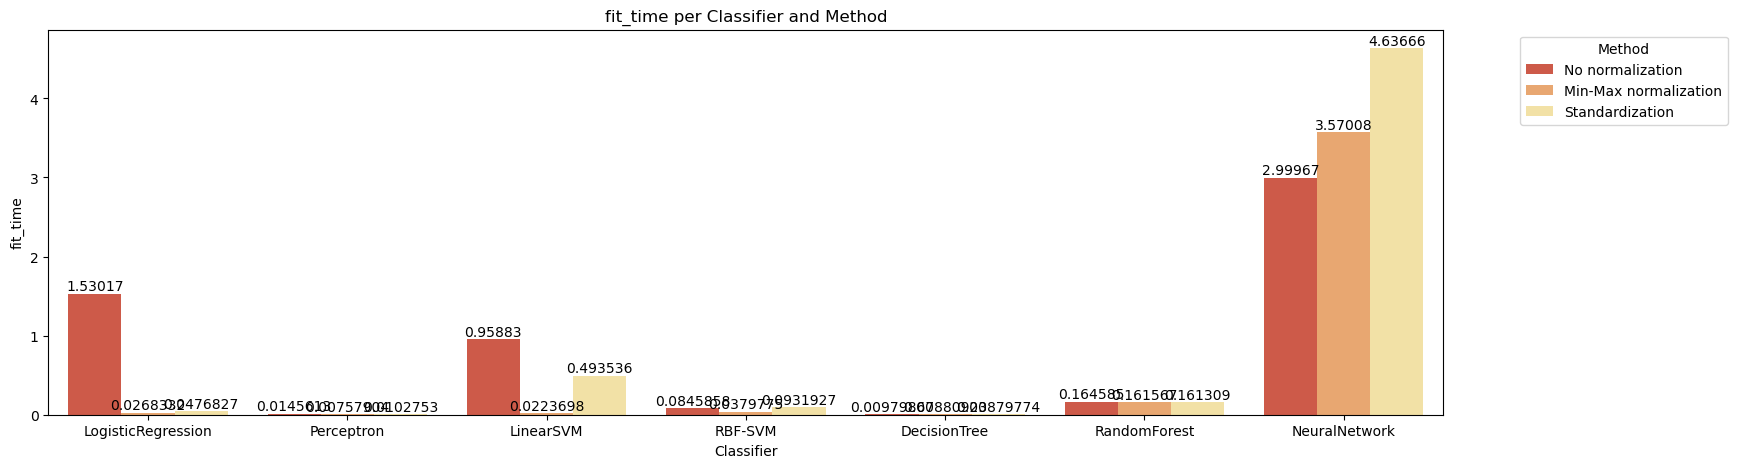

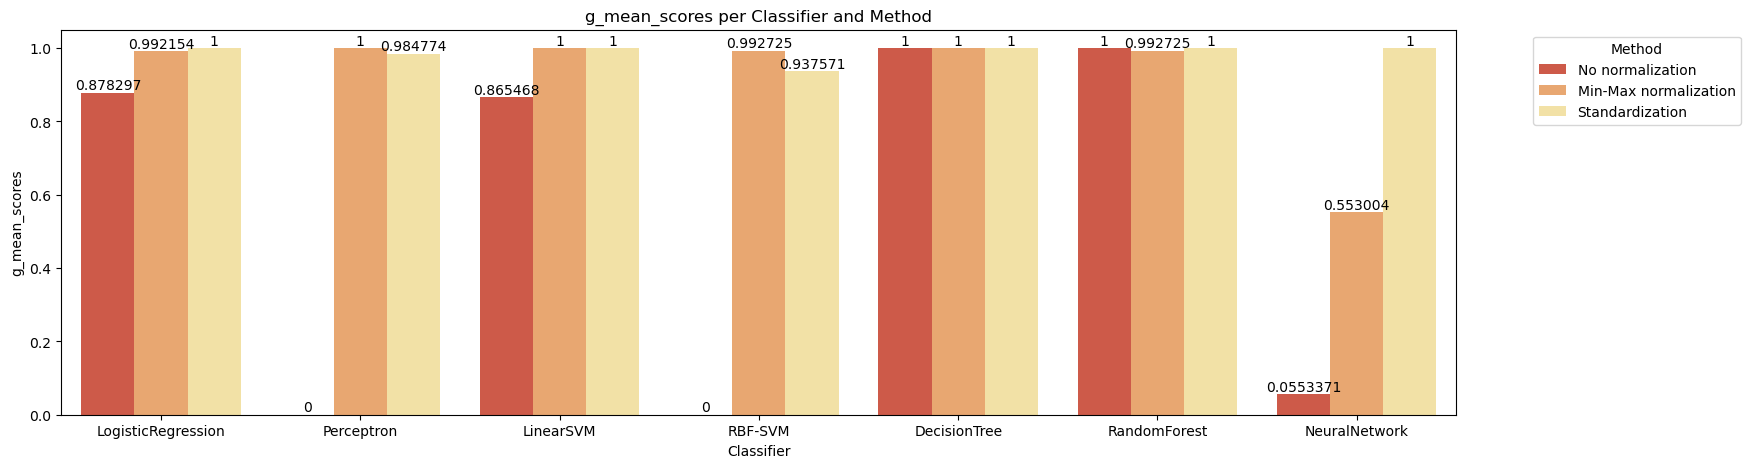

In [63]:
scores = ['accuracy_score','f1_scores','fit_time','g_mean_scores']

for score in scores:
    fig = plt.figure(figsize=(18, 5))
    ax = sns.barplot(x='classifier',y=score, hue='method', data=results, palette=sns.color_palette(palette='RdYlGn'))
    plt.title(score + ' per Classifier and Method')
    plt.xlabel('Classifier')
    plt.ylabel(score)
    plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    for i in ax.containers:
        ax.bar_label(i,)
    
    plt.show()
    
    

## By using Pipeline

In [21]:
X = mc1.iloc[:,:-2]
Y = mc1.iloc[:,-1]

In [22]:
scores=['accuracy']

pipe = Pipeline([('scaler',StandardScaler()),('logisitc',LogisticRegression(solver='liblinear'))])

cv = 5
print(X.shape)
cv_results = cross_validate(pipe, X,Y,cv=cv, scoring=scores, return_train_score=True)

# print(cv_results)
print("Accuracy:", cv_results['test_accuracy'].mean())
#print("Balanced Accuracy:", cv_results['test_balanced_accuracy_score'].mean())
#print("F1:", cv_results['test_f1_score'].mean())

(9466, 38)
Accuracy: 0.9936614693939937


In [79]:
cv_results

{'fit_time': array([0.09731984, 0.11422181, 0.10224771, 0.10823345, 0.11422491]),
 'score_time': array([0.00396252, 0.00598359, 0.00199389, 0.00199485, 0.00199556]),
 'test_accuracy': array([0.99419219, 0.99366086, 0.99524564, 0.99260433, 0.99260433]),
 'train_accuracy': array([0.99498151, 0.99405784, 0.99471808, 0.9933976 , 0.99352964])}